In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyoculus.problems import SimsoptBfieldProblem
import pickle
import horus as ho

In [2]:
bs, bsh, (nfp, coils, ma, sc_fieldline) = ho.ncsx()

#### Poincare plot

In [ ]:
nfieldlines = 30
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]
Rs = np.linspace(ma.gamma()[0, 0], ma.gamma()[0, 0] + 0.14, nfieldlines)
Zs = [ma.gamma()[0, 2] for i in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

In [ ]:
fig, axs = ho.poincare_simsopt(bsh, RZs, phis, sc_fieldline, tol = 1e-8)

In [ ]:
for col in axs[0,0].collections:
    col.set_color('black')
    col.set_sizes([0.5])

In [ ]:
pickle.dump(fig, open("../output/poincare_figure.pickle", "wb"))

#### Plot the convergence domains

In [3]:
ps = SimsoptBfieldProblem.from_coils(R0=ma.gamma()[0,0], Z0=0., Nfp=3, coils=coils, interpolate=True, ncoils=3)

{'ncoils': 3}


In [4]:
# R = np.linspace(1.2, 1.8, 31)
# Z = np.linspace(-0.6, 0.6, 61)
R = np.linspace(1.2, 1.8, 1)
Z = np.linspace(-0.6, 0.6, 2)

##### With checkonly

In [5]:
convdom_checkonly = ho.convergence_domain(ps, R, Z, rtol = 1e-7, tol = 1e-8, eps = 1e-5, checkonly = True)

0 - [DeltaR, DeltaZ] : [ 0.05091796 -0.01910802] - dtheta : 0.07462711174062031
0 - [StepR, StepZ]: [0.08144108 0.02466793]
1 - RZ : [ 1.28144108 -0.57533207] - rhotheta : [ 0.65716229 -2.07516563]
1 - [DeltaR, DeltaZ] : [0.02807603 0.00209655] - dtheta : 0.03667132271797513
1 - [StepR, StepZ]: [0.04598254 0.03128466]
2 - RZ : [ 1.32742362 -0.54404741] - rhotheta : [ 0.60807175 -2.03381286]
2 - [DeltaR, DeltaZ] : [0.00874825 0.00215658] - dtheta : 0.011360907634474948
2 - [StepR, StepZ]: [0.01453326 0.01530627]
3 - RZ : [ 1.34195687 -0.52874114] - rhotheta : [ 0.58791816 -2.02332395]
3 - [DeltaR, DeltaZ] : [0.00144171 0.00054385] - dtheta : 0.001768152511552934
3 - [StepR, StepZ]: [0.00182005 0.00298578]
4 - RZ : [ 1.34377693 -0.52575536] - rhotheta : [ 0.58443721 -2.02275699]
4 - [DeltaR, DeltaZ] : [5.92081021e-05 2.61619431e-05] - dtheta : 3.4755009485465393e-05
4 - [StepR, StepZ]: [5.60332131e-05 1.22568483e-04]
5 - RZ : [ 1.34383296 -0.52563279] - rhotheta : [ 0.58430248 -2.0227623

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 2) + inhomogeneous part.

In [3]:
fig_checkonly = pickle.load(open("../../runs/unclassified-output/NCSX_poincare.pkl", "rb"))

In [4]:
plt.show()

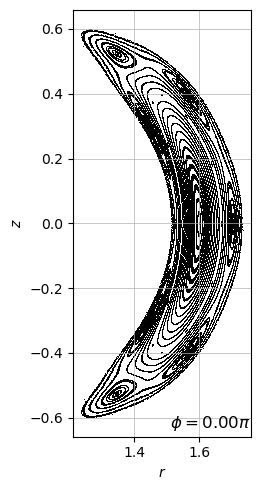

In [5]:
fig_checkonly

In [15]:
np.array(convdom_checkonly[-1], dtype=object).reshape(2, 2)

array([[<pyoculus.solvers.fixed_point.FixedPoint object at 0x000002705845AE00>,
      dtype=object)

In [13]:
convdom_checkonly

(array([[1.2, 1.8],
        [1.2, 1.8]]),
 array([[-0.6, -0.6],
        [ 0.6,  0.6]]),
 array([ 0, -1,  1, -1]),
  <pyoculus.solvers.fixed_point.FixedPoint at 0x2705845b040>])

In [12]:
ho.plot_convergence_domain(*convdom_checkonly, fig_checkonly.get_axes())

IndexError: list index out of range

In [ ]:
fig_checkonly

In [ ]:
fig_checkonly.savefig("../../figures/convergence_domain_checkonly.png", dpi=600)

##### Without checkonly

In [ ]:
convdom = ho.convergence_domain(ps, R, Z, rtol = 1e-10, tol = 1e-4, eps = 1e-4, checkonly = False)

In [ ]:
fig = pickle.load(open("../output/poincare_figure.pickle", "rb"))

In [ ]:
ho.plot_convergence_domain(*convdom, ax=fig.get_axes()[0])

In [ ]:
fig

In [ ]:
fig.savefig("../../figure/convergence_domain.png", dpi=600)